In [1]:
import pandas as pd
from sklearn import linear_model as lm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np

df = pd.read_csv("JSS_Training_Data_3.csv", index_col="molecule")
X = df[["mw", "mp"]]
y = df["jss"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)
print(f"train size: {Xtrain.shape}\ntest size: {Xtest.shape}")


train size: (36, 2)
test size: (10, 2)


In [2]:
pipeline = make_pipeline(IterativeImputer(),  PowerTransformer(), PolynomialFeatures(), lm.LinearRegression())
hyper_params = {
    "polynomialfeatures__degree": np.arange(0, 5),
    "linearregression__fit_intercept": [True, False]
}
grid = GridSearchCV(pipeline, hyper_params, cv=5, n_jobs=-1, scoring="r2")
grid.fit(Xtrain, ytrain)

model = grid.best_estimator_
model

Pipeline(steps=[('iterativeimputer', IterativeImputer()),
                ('powertransformer', PowerTransformer()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [3]:
model.fit(Xtrain, ytrain)
print(f"train score (r2): {model.score(Xtrain, ytrain)}")
print(f"test score (r2): {model.score(Xtest, ytest)}")

train score (r2): 0.5476792103992321
test score (r2): -13.788998578692278


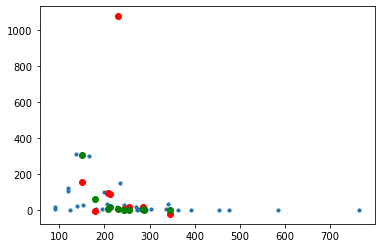

In [32]:
import matplotlib.pyplot as plt

plt.scatter(Xtrain["mw"], ytrain, s=10)
plt.scatter(Xtest["mw"], model.predict(Xtest), color='r')
plt.scatter(Xtest["mw"], ytest, color='g')